# Modèle de prédiction popularité jeux vidéo 🎮
### 🎯 Contexte & question business
Dataset : Les données ont été scrappées via l'API Steam et merged avec un Data Set de Global Sales et regroupe des info jeux vidéo comme prix, genres, plateformes aussi des indicateurs d’avis et d’engagement des joueurs.

Question :  Peut-on prédire le revenu d'un jeu vidéo à partir de ses caractéristiques (prix, genres, plateformes, contenu) et d'engagement du jouer ?

KPI's :
Performance du modèle de prédiction :
  - R² (coefficient de détermination)
  - RMSE (erreur quadratique moyenne)
- Indicateurs métier :
  - Prix du jeu
  - Genres
  - Plateformes
  - Engagement des joueurs (notes et volume d’avis)

### 🧩 Variables principales

| Variables numériques | Variables catégorielles | Variables temporelles | Variables textuelles |
|---------------------|------------------------|-----------------------|----------------------|
| required_age | english | release_date | name |
| achievements | developer |  | publisher |
| positive_ratings | platforms |  | categories |
| negative_ratings | genres |  | steamspy_tags |
| average_playtime |  |  | |
| median_playtime |  |  | |
| owners |  |  | |
| price |  |  | |
| NA_Sales |  |  | |
| EU_Sales |  |  | |
| JP_Sales |  |  | |
| Other_Sales |  |  | |
| Global_Sales |  |  | |
| Critic_Score |  |  | |
| Critic_Count |  |  | |
| User_Score |  |  | |
| User_Count |  |  | |

--> On ne va pas tout utiliser évidement


### Définition des variables

**Variable cible**  
`Global_Sales` : Ventes globales du jeu vidéo (en millions d’unités)

**Variables explicatives**

`release_date` : Date de sortie du jeu vidéo

`price` : Prix du jeu sur la plateforme Steam

`required_age` : Âge minimum requis pour accéder au jeu

`achievements` : Nombre de succès

`average_playtime` : Temps de jeu moyen cumulé par les joueurs

`median_playtime` : Temps de jeu médian

`positive_ratings` : Nombre total d’avis positifs

`negative_ratings` : Nombre total d’avis négatifs

`User_Score` : Note moyenne attribuée par les joueur

`User_Count` : Nombre total de joueurs ayant laissé une note

`Critic_Score` : Note moyenne attribuée par les critiques pro et ou presse

`Critic_Count` : Nombre de critiques

`owners` : Estimation du nombre de propriétaires du jeu

`platforms` : Plateformes sur lesquelles le jeu est disponible

`genres` : Genres associés au jeu vidéo,

`categories` : Catégories fonctionnelles du jeu

`english` : Indique si le jeu est disponible en anglais

`NA_Sales` : Ventes du jeu en Amérique du Nord (en millions)

`EU_Sales` : Ventes du jeu en Europe (en millions)

`JP_Sales` : Ventes du jeu au Japon (en millions)

`Other_Sales` : Ventes du jeu dans les autres régions du monde (en millions).

## Sources de données & merge

Ce projet s’appuie sur deux datasets Kaggle :

1) Clean merge of Steam Store Games (Clean dataset)  
→ Données issues de Steam : prix, genres, plateformes, descriptions et indicateurs d’avis et d’engagement des joueurs.

2) Video Game Sales with Ratings  
→ Données orientées business, incluant les ventes globales ainsi que des informations de notation.

Les deux sources ont été fusionnées à l’aide de SteamDataMerger afin d’obtenir un dataset combinant les caractéristiques des jeux disponibles sur Steam et leurs ventes globales.

### Pourquoi seulement 54 lignes au final ?
Le dataset Steam d’origine contient plus de 27 000 jeux, mais la variable cible Global_Sales n’est pas disponible pour la majorité d’entre eux.

Lors du merge, seules les observations pour lesquelles on dispose à la fois :
- des caractéristiques issues de Steam
- et des informations complètes sur les ventes

ont pu être conservées.

Après filtrage et nettoyage des données exploitables, le dataset final contient donc 54 observations.

### ⚙️ Imports et Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### ⚡Ouverture et Exploration du Dataset

In [ ]:
df_verif = pd.read_csv('merged_steam_games.csv', engine='python')
df = pd.read_csv('merged_steam_games.csv', engine='python')
df.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,price,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Just Cause 2,2010-03-23,1,Avalanche Studios,Square Enix,windows,18,Single-player;Steam Achievements;Full controll...,Action;Adventure,Open World;Action;Sandbox,...,9.99,0.00,0.10,0.0,0.02,0.12,84.0,33.0,7.7,838.0
1,Call of Duty: World at War,2008-11-18,1,Treyarch,Activision,windows,16,Single-player;Multi-player;Co-op,Action,Zombies;World War II;FPS,...,19.99,0.02,0.14,0.0,0.03,0.18,83.0,36.0,7.5,721.0
2,Overlord II,2009-06-24,1,Triumph Studios;Virtual Programming,Codemasters,windows;mac;linux,0,Single-player,RPG,RPG;Villain Protagonist;Fantasy,...,6.99,0.00,0.03,0.0,0.00,0.03,79.0,32.0,8.1,159.0
3,Operation Flashpoint: Dragon Rising,2009-10-08,1,Codemasters Studios,Codemasters,windows,0,Single-player;Partial Controller Support,Action,Action;FPS;Tactical,...,6.99,0.02,0.03,0.0,0.01,0.05,76.0,29.0,4.9,539.0
4,F.E.A.R. 2: Project Origin,2009-02-12,1,Monolith,Warner Bros. Interactive Entertainment,windows,0,Single-player;Multi-player,Action,Horror;FPS;Action,...,9.99,0.02,0.05,0.0,0.01,0.07,79.0,49.0,7.8,520.0


In [ ]:
df.columns

Index(['name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [ ]:
df.shape

(54, 26)

In [ ]:
#on sélectionne seulement les var qui nous intéressent
df=df[['release_date', 'required_age','genres',
       'achievements',
       'average_playtime', 'median_playtime', 'price', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      54 non-null     object 
 1   required_age      54 non-null     int64  
 2   genres            54 non-null     object 
 3   achievements      54 non-null     int64  
 4   average_playtime  54 non-null     int64  
 5   median_playtime   54 non-null     int64  
 6   price             54 non-null     float64
 7   Global_Sales      54 non-null     float64
 8   Critic_Score      54 non-null     float64
 9   Critic_Count      54 non-null     float64
 10  User_Score        54 non-null     float64
 11  User_Count        54 non-null     float64
dtypes: float64(6), int64(4), object(2)
memory usage: 5.2+ KB


### 🧹Nettoyage du Dataset

In [ ]:
#Check valeur manquante
df.isna().sum()

,0
release_date,0
required_age,0
genres,0
achievements,0
average_playtime,0
median_playtime,0
price,0
Global_Sales,0
Critic_Score,0
Critic_Count,0


In [ ]:
#on transforme la date pour garder que l'année
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
# Supprime ancienne colonne date
df = df.drop(columns=['release_date'])
df[['release_year']].head(2)

,release_year
0,2010
1,2008


In [ ]:
#on va encoder la variable genre car elle est pas numérique et donc pas utilisable pour la régression

In [ ]:
#Compter le nb de genre dans la colonnes
df['nb_genres'] = df['genres'].str.split(',').str.len()

In [ ]:
top_genres = ['Action', 'Adventure', 'RPG', 'Indie', 'Casual']

In [ ]:

for ks in top_genres:
    df[ks] = df['genres'].str.contains(ks).astype(int)

In [ ]:
#on se devarasse de l'ancienne colonne de texte
df = df.drop(columns=['genres'])

In [ ]:
df.head(2)

,required_age,achievements,average_playtime,median_playtime,price,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,release_year,nb_genres,Action,Adventure,RPG,Indie,Casual
0,18,50,519,272,9.99,0.12,84.0,33.0,7.7,838.0,2010,1,1,1,0,0,0
1,16,0,2331,1108,19.99,0.18,83.0,36.0,7.5,721.0,2008,1,1,0,0,0,0


### 📲 Analyses EDA

In [ ]:
#check valeur abberantes
df.describe()

,required_age,achievements,average_playtime,median_playtime,price,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,release_year,nb_genres,Action,Adventure,RPG,Indie,Casual
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
mean,5.074074,35.240741,1217.703704,929.759259,14.665926,0.262222,74.944444,30.018519,6.964815,1011.648148,2011.944444,1.0,0.462963,0.259259,0.296296,0.092593,0.037037
std,7.911901,31.187767,1840.397820,1212.465661,7.091822,0.582952,11.054610,15.648848,1.491126,1726.612434,2.616469,0.0,0.503308,0.442343,0.460911,0.292582,0.190626
min,0.000000,0.000000,0.000000,0.000000,6.990000,0.010000,49.000000,5.000000,1.400000,5.000000,2008.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,221.750000,256.250000,8.615000,0.042500,65.250000,18.000000,6.050000,149.750000,2010.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,553.500000,451.000000,13.990000,0.070000,76.500000,31.000000,7.450000,433.000000,2011.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,50.000000,1237.750000,1179.250000,16.990000,0.187500,83.750000,42.000000,7.900000,815.000000,2014.000000,1.0,1.000000,0.750000,1.000000,0.000000,0.000000
max,18.000000,97.000000,9413.000000,6403.000000,34.990000,3.880000,94.000000,67.000000,8.900000,9073.000000,2016.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


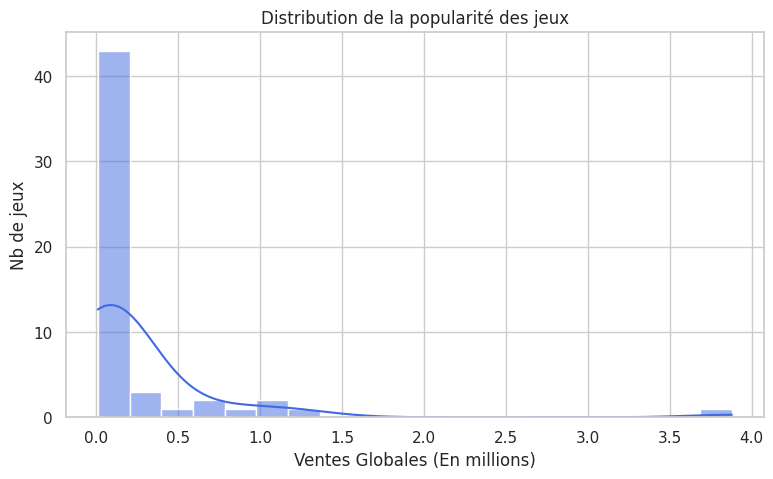

In [ ]:
#var cible continue ? pas de valeur bizarre
sns.set(style='whitegrid')

plt.figure(figsize=(9,5))
sns.histplot(df['Global_Sales'], bins=20, kde=True, color='royalblue')
plt.title('Distribution de la popularité des jeux')
plt.xlabel('Ventes Globales (En millions)')
plt.ylabel('Nb de jeux')
plt.show()

### Distribution des ventes globales

La distribution des ventes globales est  asymétrique :
la majorité des jeux réalisent des ventes inférieures à 0.5 millions

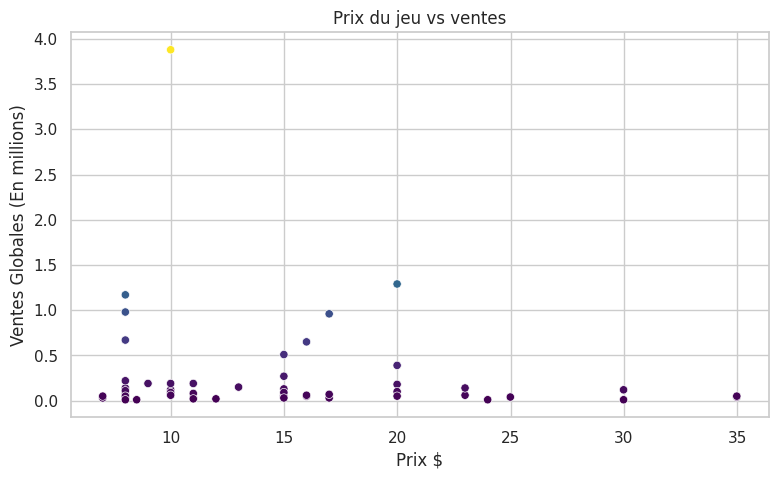

In [ ]:
#(-cher = + populaire ?) check linearite entre prix et popularite
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='price',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Prix du jeu vs ventes')
plt.xlabel('Prix $')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

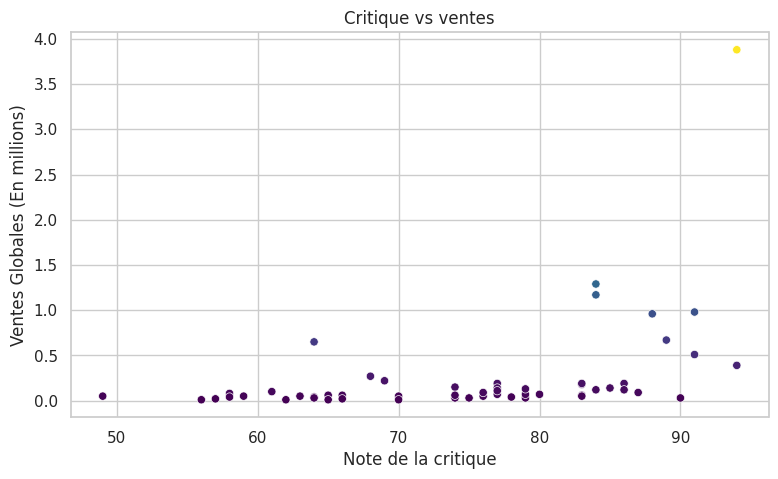

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='Critic_Score',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Critique vs ventes')
plt.xlabel('Note de la critique')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

In [ ]:
#Comme la distribution de global sales et asymétrique on va utiliser le log pour mieux visualiser la ligne Riter avec nos autres variables

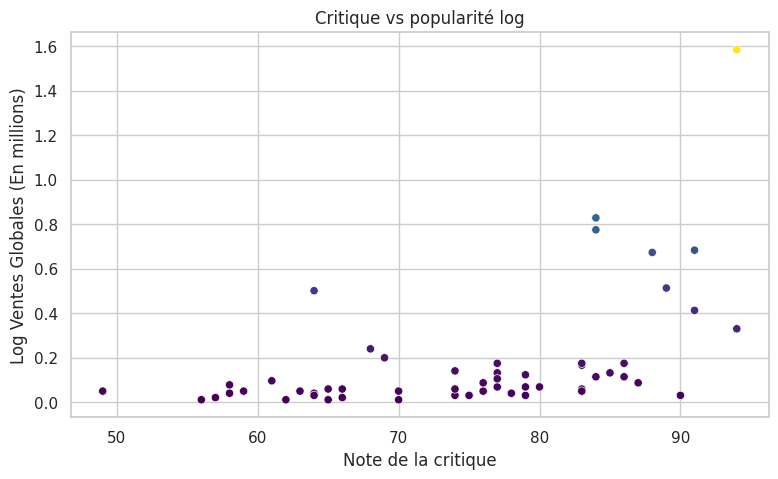

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='Critic_Score',
    y=np.log1p(df['Global_Sales']),
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Critique vs popularité log')
plt.xlabel('Note de la critique')
plt.ylabel('Log Ventes Globales (En millions)')
plt.show()

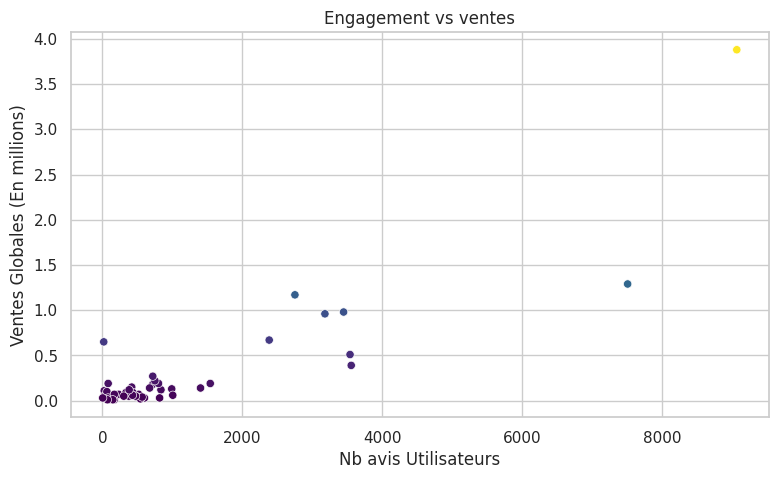

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='User_Count',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Engagement vs ventes')
plt.xlabel('Nb avis Utilisateurs')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

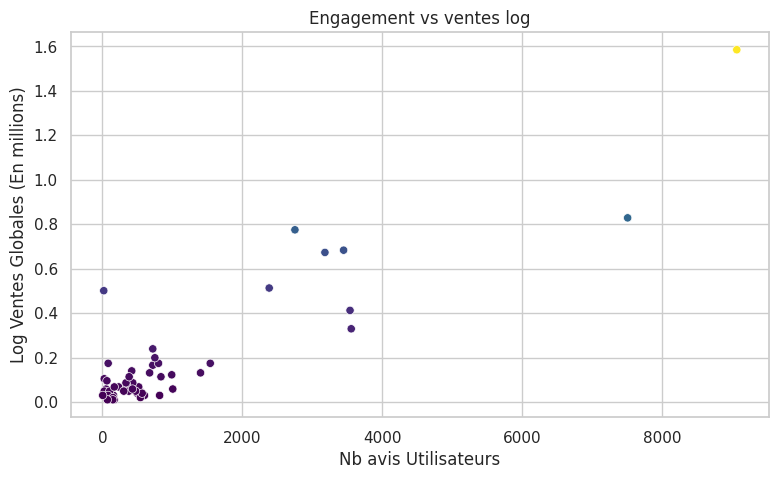

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='User_Count',
    y=np.log1p(df['Global_Sales']),
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Engagement vs ventes log')
plt.xlabel('Nb avis Utilisateurs')
plt.ylabel('Log Ventes Globales (En millions)')
plt.show()

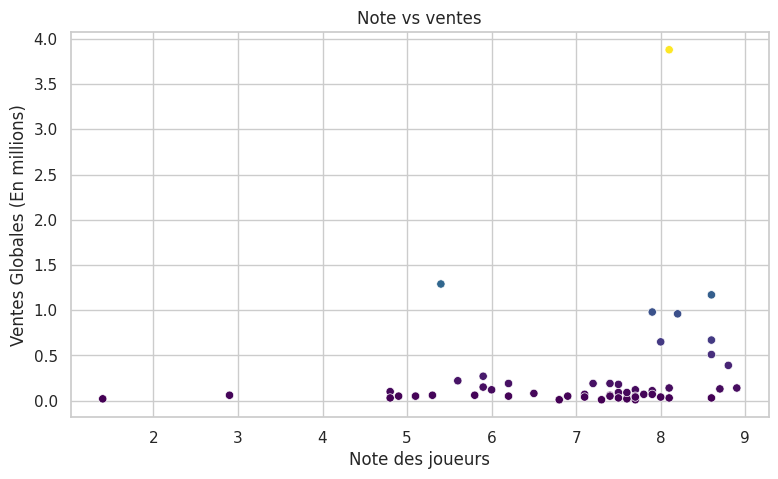

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='User_Score',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Note vs ventes')
plt.xlabel('Note des joueurs')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

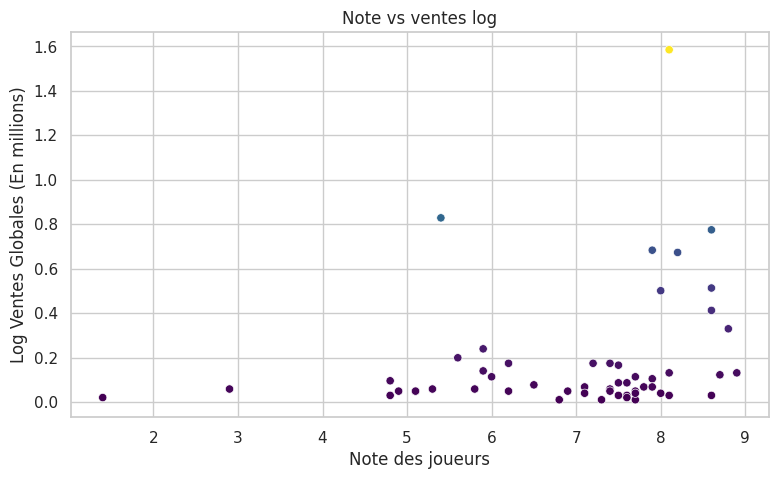

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='User_Score',
    y=np.log1p(df['Global_Sales']),
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Note vs ventes log')
plt.xlabel('Note des joueurs')
plt.ylabel('Log Ventes Globales (En millions)')
plt.show()

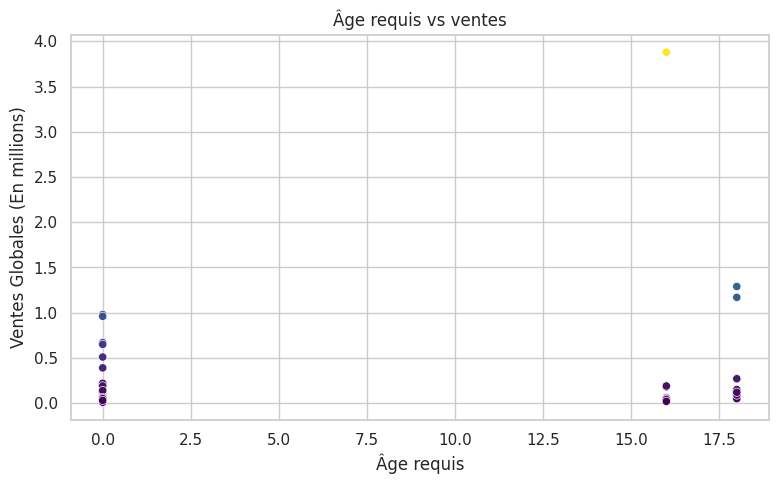

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='required_age',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Âge requis vs ventes')
plt.xlabel('Âge requis')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

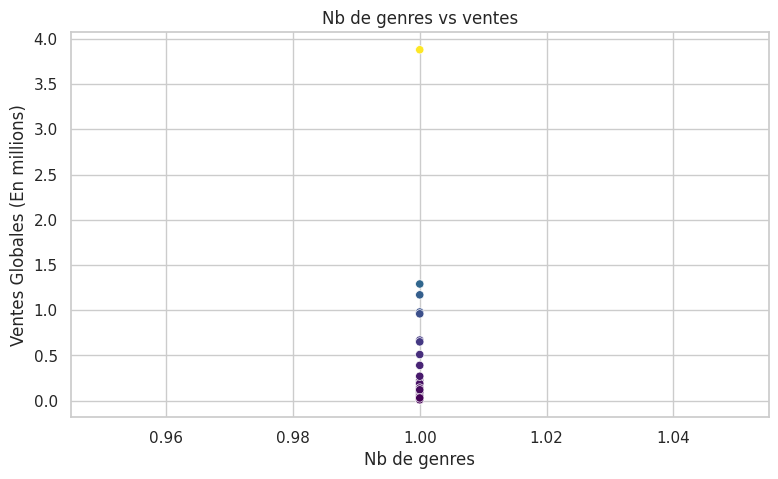

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=df,
    x='nb_genres',
    y='Global_Sales',
    hue='Global_Sales',
    palette='viridis',
    legend=False
)
plt.title('Nb de genres vs ventes')
plt.xlabel('Nb de genres')
plt.ylabel('Ventes Globales (En millions)')
plt.show()

In [ ]:
colonne_num = df.select_dtypes(include=['int64', 'float64']).columns
# Remove 'nb_genres' from the list of columns for correlation calculation
# as it seems to be a constant column causing issues with correlation and heatmap plotting.
if 'nb_genres' in colonne_num:
    colonne_num = colonne_num.drop('nb_genres')
corr = df[colonne_num].corr()
corr

,required_age,achievements,average_playtime,median_playtime,price,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,nb_genres,Action,Adventure,RPG,Indie,Casual
required_age,1.000000,0.447319,0.090509,0.033625,0.152933,0.239849,0.013207,-0.024242,-0.196648,0.256841,NaN,0.536113,0.156145,0.014564,-0.206786,-0.126955
achievements,0.447319,1.000000,0.483966,0.258314,0.439219,0.152317,-0.057916,0.161395,-0.139179,0.177726,NaN,0.186288,-0.044272,-0.012931,-0.016963,-0.122126
average_playtime,0.090509,0.483966,1.000000,0.798810,0.364481,0.522309,0.329960,0.194676,0.155979,0.499688,NaN,-0.268134,-0.272857,0.089056,-0.019010,-0.108499
median_playtime,0.033625,0.258314,0.798810,1.000000,0.218580,0.483765,0.197804,0.142172,0.070864,0.408338,NaN,-0.239588,-0.270697,0.096658,-0.134712,-0.105759
price,0.152933,0.439219,0.364481,0.218580,1.000000,-0.121427,-0.078091,0.114134,0.028430,-0.035555,NaN,0.085115,0.096456,-0.235596,-0.044372,-0.088651
Global_Sales,0.239849,0.152317,0.522309,0.483765,-0.121427,1.000000,0.420751,0.173048,0.198483,0.882999,NaN,-0.127042,-0.139104,0.371085,-0.115170,-0.080555
Critic_Score,0.013207,-0.057916,0.329960,0.197804,-0.078091,0.420751,1.000000,0.511427,0.447889,0.539680,NaN,-0.215715,-0.209218,0.099572,0.065789,0.054717
Critic_Count,-0.024242,0.161395,0.194676,0.142172,0.114134,0.173048,0.511427,1.000000,0.181961,0.376399,NaN,-0.025065,-0.164250,0.370686,-0.078679,-0.272209
User_Score,-0.196648,-0.139179,0.155979,0.070864,0.028430,0.198483,0.447889,0.181961,1.000000,0.199734,NaN,-0.249404,0.188585,0.078597,0.241145,0.150704
User_Count,0.256841,0.177726,0.499688,0.408338,-0.035555,0.882999,0.539680,0.376399,0.199734,1.000000,NaN,-0.134379,-0.147510,0.468978,-0.105520,-0.060323


In [ ]:
#calcule la moyenne de chaque genre
moyenne_genre = []

for ao in top_genres:
    moyenne_genre.append(df[df[ao] == 1]['Global_Sales'].mean())

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()

/tmp/ipython-input-384518964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


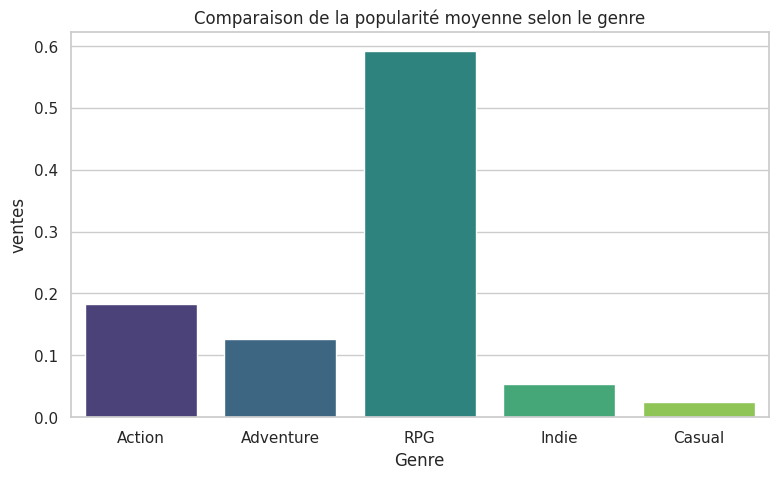

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(
    x=top_genres,
    y=moyenne_genre,
    palette='viridis'
)

plt.title('Comparaison de la popularité moyenne selon le genre')
plt.xlabel('Genre')
plt.ylabel('ventes')
plt.show()

#### Interprétations :


Le tableau de corrélation montre que les vars liées à la visibilité et à l’engagement des joueurs, notamment `User_Count` et `Critic_Count`, présentent les liens les plus forts avec `Global_Sales`. Ces résultats suggèrent que le succès commercial d’un jeu dépend davantage de son exposition et de l’implication de sa communauté que de ses caractéristiques

À l’inverse, des vars comme le prix ou l’âge requis affichent des corrélations plus faibles avec les vente

L’analyse par segments met en évidence que certains genres, comme l’Action et le RPG, tendent à afficher des ventes moyennes plus élevées.

### Interprétation des corrélations

- Les ventes régionales sont très fortement corrélées à `Global_Sales` car elles en sont les composantes directes.
- `User_Count` est fortement corrélé aux ventes, montrant que les jeux les plus vendus génèrent plus d’utilisateurs.
- `positive_ratings` est fortement lié aux ventes, indiquant que les jeux populaires reçoivent plus d’avis positifs.
- `average_playtime` et `median_playtime` sont modérément corrélés aux ventes, suggérant que les jeux les plus vendus sont davantage joués.
- `Critic_Score` présente une corrélation modérée, indiquant une influence partielle des critiques professionnelles.
- `User_Score` et `Critic_Count` ont une corrélation faible, montrant qu’ils expliquent peu le niveau de ventes.

### ⚡ Modèle

In [ ]:
#Var cible on remet le log pour la consistence
y = np.log1p(df['Global_Sales'])

#Var explicative
x = df.drop(columns=['Global_Sales'])


y.head()

,Global_Sales
0,0.113329
1,0.165514
2,0.029559
3,0.048790
4,0.067659


In [ ]:
x.head()

,required_age,achievements,average_playtime,median_playtime,price,Critic_Score,Critic_Count,User_Score,User_Count,release_year,nb_genres,Action,Adventure,RPG,Indie,Casual
0,18,50,519,272,9.99,84.0,33.0,7.7,838.0,2010,1,1,1,0,0,0
1,16,0,2331,1108,19.99,83.0,36.0,7.5,721.0,2008,1,1,0,0,0,0
2,0,0,197,119,6.99,79.0,32.0,8.1,159.0,2009,1,0,0,1,0,0
3,0,0,413,417,6.99,76.0,29.0,4.9,539.0,2009,1,1,0,0,0,0
4,0,0,301,367,9.99,79.0,49.0,7.8,520.0,2009,1,1,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(37, 16) (17, 16) (37,) (17,)


In [ ]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
print(y_pred)

[ 0.08247385  1.27970902  0.04239233  0.63368601  0.11444037  0.74390534
 -0.01121473 -0.02038345  0.12361406  0.01152986  0.15593677  0.61793416
  0.01334072  0.49774775  0.16720912  0.14777065 -0.14428076]


In [ ]:
y_train

,Global_Sales
24,0.048790
45,0.058269
33,0.122218
50,0.048790
15,0.173953
9,0.774727
16,0.131028
30,0.672944
36,0.048790
25,1.585145


In [ ]:
y_test

,Global_Sales
19,0.198851
49,0.828552
48,0.009950
12,0.329304
44,0.048790
5,0.412110
17,0.039221
52,0.029559
3,0.048790
32,0.095310


In [ ]:
y_pred_train=model.predict(x_train)
coef=model.coef_
coef

array([ 1.76289322e-03, -1.03075024e-03, -2.91415752e-05,  7.85049776e-05,
       -1.77258256e-03,  1.19838555e-03, -1.83397432e-03,  2.29056160e-02,
        1.68748624e-04,  6.22820364e-03, -3.01841885e-16,  3.96663672e-02,
       -4.81232982e-02, -1.16883334e-02,  2.82850650e-02, -2.38820397e-01])

In [ ]:
r2 = r2_score(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('R² :', r2)
print('RMSE :', rmse)

R² : 0.9536591673825693
RMSE : 0.06225384862246781


In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R² :', r2)
print('RMSE :', rmse)

R² : 0.5203087339635859
RMSE : 0.17176830096037865


#### Interprétations :

Notre modèle de régression linéaire obtient un coefficient de détermination R² de 0,52, ce qui signifie qu’il explique environ 52 % de la variance des ventes globales.

La valeur du RMSE est de 0,17, indiquant une erreur moyenne relativement faible entre les ventes observées et les ventes prédites.


### Test du modèle sur jeux fictif

In [ ]:
Jeu1 = pd.DataFrame([{    'price': 49.99,
    'Critic_Score': 85,
    'Critic_Count': 60,
    'User_Score': 8.5,
    'User_Count': 2500,
    'release_year': 2026,
    'required_age': 0,
    'achievements': 0,
    'average_playtime': 0,
    'median_playtime': 0,
    'nb_genres': 0,
    'Action': 0,
    'Adventure': 0,
    'RPG': 0,
    'Indie': 0,
    'Casual': 0
}])

Jeu1 = Jeu1[x.columns]

model.predict(Jeu1)

array([0.46021354])

In [ ]:
Jeu2 = pd.DataFrame([{    'price': 9.99,
    'Critic_Score': 60,
    'Critic_Count': 10,
    'User_Score': 6.2,
    'User_Count': 120,
    'release_year': 2026,
    'required_age': 0,
    'achievements': 0,
    'average_playtime': 0,
    'median_playtime': 0,
    'nb_genres': 0,
    'Action': 0,
    'Adventure': 0,
    'RPG': 0,
    'Indie': 0,
    'Casual': 0
}])

Jeu2 = Jeu2[x.columns]

model.predict(Jeu2)

array([0.13855127])

In [ ]:
#Attention les résultats sont en log il faut utiliser exp

In [49]:
Resultat_jeu1=np.expm1(model.predict(Jeu1))
print("Les revenu estimé pour votre jeu sont de :",Resultat_jeu1,'millions')
Resultat_jeu2=np.expm1(model.predict(Jeu2))
print("Les revenu estimé pour votre jeu sont de :",Resultat_jeu2,'millions')

Les revenu estimé pour votre jeu sont de : [0.58441228] millions
Les revenu estimé pour votre jeu sont de : [0.14860857] millions


le but de ce test est de pouvoir extrapoler une prédiction d'un jeu qui sortira en 2026 ou même plus tard en utilisant notre modèle et pouvoir estimer les ventes en millions

on n'en a effectué deux, en modifiant les variables explicative pour voir si l'un fonctionne plus que l'autre

In [ ]:
coef=pd.DataFrame(model.coef_, index=x.columns, columns=['coef']).sort_values(by='coef', ascending=False)
coef

,coef
Action,3.966637e-02
Indie,2.828507e-02
User_Score,2.290562e-02
release_year,6.228204e-03
required_age,1.762893e-03
Critic_Score,1.198386e-03
User_Count,1.687486e-04
median_playtime,7.850498e-05
nb_genres,-3.018419e-16
average_playtime,-2.914158e-05


In [ ]:
numcol=df_verif.select_dtypes(include=['int64', 'float64']).columns
corr=df_verif[numcol].corrwith(df_verif['Global_Sales']).sort_values(ascending=False)
corr

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
Global_Sales,1.000000
Other_Sales,0.977116
EU_Sales,0.975682
NA_Sales,0.928591
User_Count,0.882999
positive_ratings,0.750266
average_playtime,0.522309
median_playtime,0.483765
negative_ratings,0.472356
Critic_Score,0.420751
